In [1]:
"""Author: Peter Mankowski"""
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
"""Loading the dataset"""
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


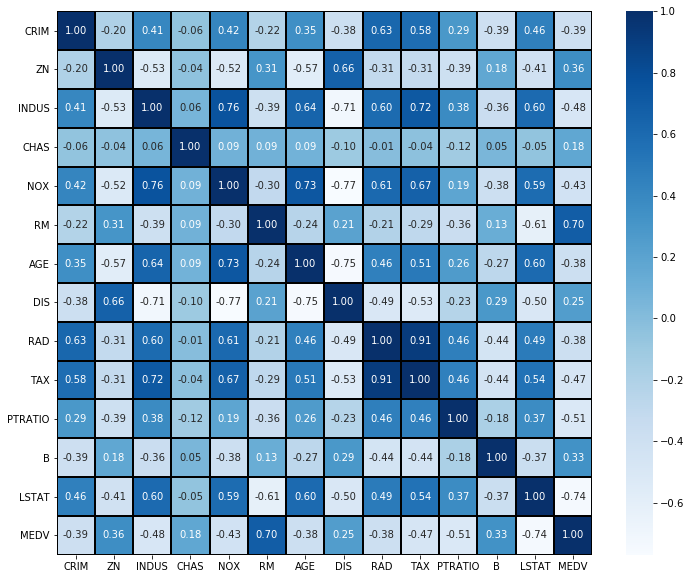

In [3]:
"""Filter method: Filter and take only the subset of the relevant features. 
    The model is built after selecting the features. The filtering here is done using correlation matrix
    and it is most commonly done using Pearson correlation.
    Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with
    the output variable MEDV. Only select features which has correlation of above 0.5 (taking absolute value) 
    with the output variable.

The correlation coefficient has values between -1 to 1
    — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    — A value closer to 1 implies stronger positive correlation
    — A value closer to -1 implies stronger negative correlation"""

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, linewidths=1, linecolor='black', cbar=True, fmt=".2f")
plt.show()

In [7]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.45]
relevant_features

INDUS      0.483725
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [6]:
""" One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other.
If these variables are correlated with each other, 
then you need to keep only one of them and drop the rest."""
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())
print(df[["RM","PTRATIO"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000
               RM   PTRATIO
RM       1.000000 -0.355501
PTRATIO -0.355501  1.000000


In [ ]:
"""After dropping RM, two features are left:
-LSTAT
-PTRATIO 
These are the final features given by Pearson correlation."""